In [2]:
import pennylane as qml
import numpy as np

(<Figure size 1800x1000 with 1 Axes>, <Axes: >)

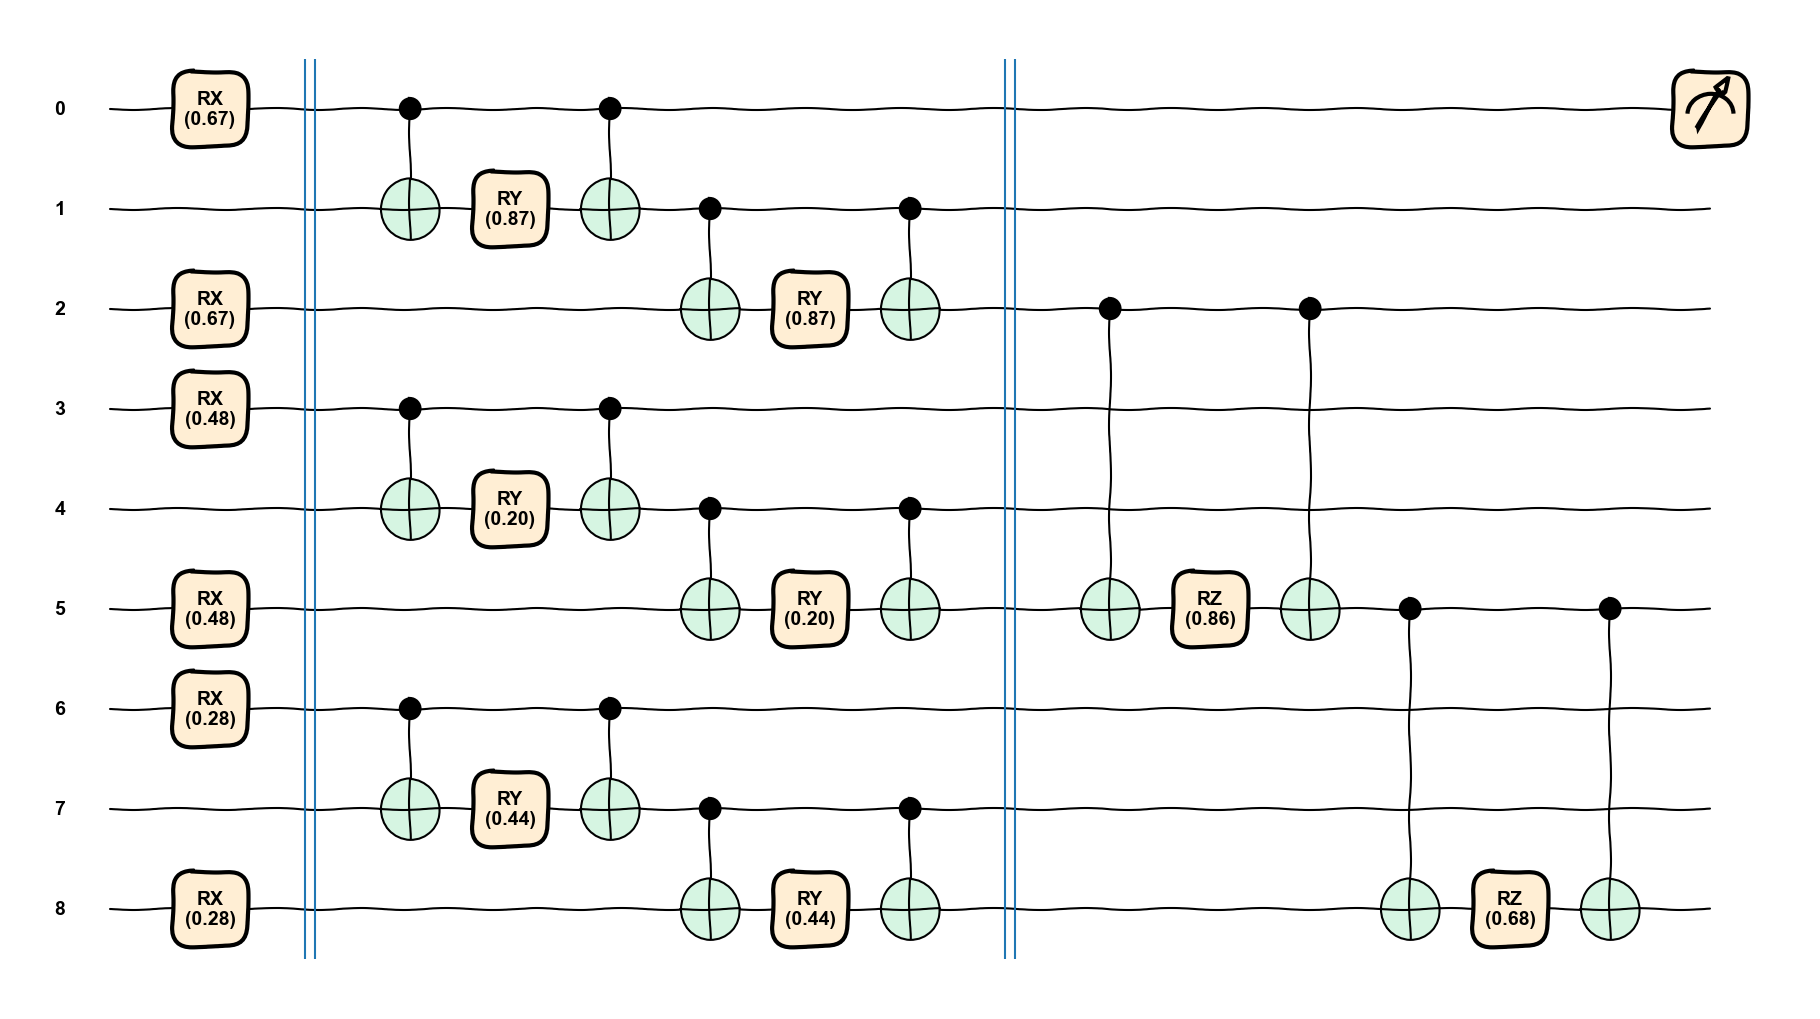

In [43]:
#### Equivariant embedding
dev = qml.device("default.qubit", wires=9)
def equivariant_ansatz(params, theta, omega,  wires=9):
    for wire in [0, 2]:
        qml.RX(params[0], wires=wire)
    for wire in [3, 5]:
        qml.RX(params[1], wires=wire)
    for wire in [6, 8]:
        qml.RX(params[2], wires=wire)
        
    qml.Barrier(only_visual=True)
    
    qml.CNOT(wires=[0,1])
    qml.RY(theta[0], wires=1)
    qml.CNOT(wires=[0,1])
    qml.CNOT(wires=[1,2])
    qml.RY(theta[0], wires=2)
    qml.CNOT(wires=[1,2])
    
    qml.CNOT(wires=[3,4])
    qml.RY(theta[1], wires=4)
    qml.CNOT(wires=[3,4])
    qml.CNOT(wires=[4,5])
    qml.RY(theta[1], wires=5)
    qml.CNOT(wires=[4,5])
    
    qml.CNOT(wires=[6,7])
    qml.RY(theta[2], wires=7)
    qml.CNOT(wires=[6,7])
    qml.CNOT(wires=[7,8])
    qml.RY(theta[2], wires=8)
    qml.CNOT(wires=[7,8])
    
    qml.Barrier(only_visual=True)
    
    qml.CNOT(wires=[2,5])
    qml.RZ(omega[0], wires=5)
    qml.CNOT(wires=[2, 5])
    qml.CNOT(wires=[5, 8])
    qml.RZ(omega[1], wires=8)
    qml.CNOT(wires=[5, 8])
    
    

@qml.qnode(device=dev, interface="jax")
def circuit(params, theta, omega, wires=9):
    equivariant_ansatz(params, theta, omega,  wires)
    return qml.probs(wires=0)
    
phi_start = np.random.rand(3)
theta_start = np.random.rand(3)
omega_start = np.random.rand(2)
qml.draw_mpl(circuit, decimals=2, style="sketch")(phi_start, theta_start, omega_start, wires=9)